<a href="https://colab.research.google.com/github/KohsukeIde/Mathematics-for-Social-Engineering/blob/main/%E7%A4%BE%E4%BC%9A%E6%95%B0%E5%AD%A6%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

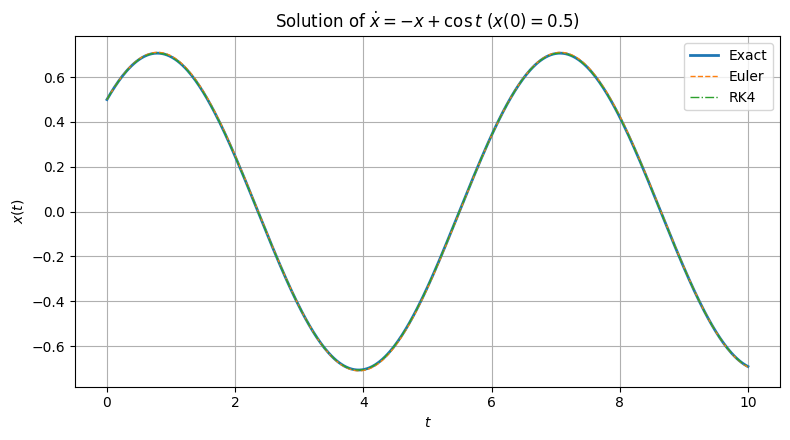

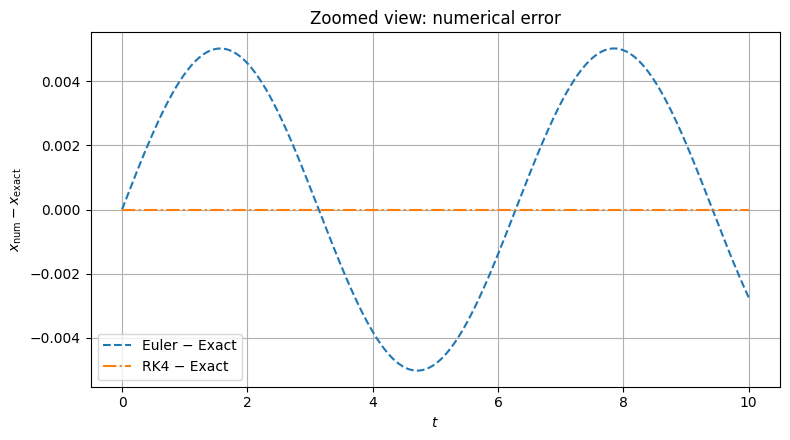

Max abs error (Euler): 5.025e-03
Max abs error (RK4)  : 7.481e-10


In [ ]:
# -------------------- Problem 1.2: numerical integration --------------------
# ODE: dx/dt = -x + cos(t),  x(0) = 0.5
# Methods: Explicit Euler & 4th-order Runge–Kutta
# ---------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# -------------------- configurable parameters ------------------------------
t0, t_end = 0.0, 10.0     # integration interval
dt          = 0.02        # time-step
x0          = 0.5         # initial value
# ---------------------------------------------------------------------------

# Time grid
t = np.arange(t0, t_end + dt, dt)
n = t.size

# Storage
x_euler = np.empty_like(t)
x_rk4   = np.empty_like(t)

# Initial condition
x_euler[0] = x_rk4[0] = x0

# RHS of the ODE
def f(t, x):
    return -x + np.cos(t)

# Exact solution
def x_exact(t, x0):
    C = x0 - 0.5
    return 0.5 * (np.sin(t) + np.cos(t)) + C * np.exp(-t)

# Euler integration
for k in range(n - 1):
    x_euler[k+1] = x_euler[k] + dt * f(t[k], x_euler[k])

# RK4 integration
for k in range(n - 1):
    k1 = f(t[k],               x_rk4[k])
    k2 = f(t[k] + dt/2,        x_rk4[k] + dt/2 * k1)
    k3 = f(t[k] + dt/2,        x_rk4[k] + dt/2 * k2)
    k4 = f(t[k] + dt,          x_rk4[k] + dt     * k3)
    x_rk4[k+1] = x_rk4[k] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Exact values
x_true = x_exact(t, x0)

# ----------------------------- Figure 1 ------------------------------------
plt.figure(figsize=(8, 4.5))
plt.plot(t, x_true,  label='Exact', linewidth=2)
plt.plot(t, x_euler, '--', label='Euler', linewidth=1)
plt.plot(t, x_rk4,   '-.', label='RK4',   linewidth=1)
plt.title(r"Solution of $\dot{x}=-x+\cos t$ ($x(0)=0.5$)")
plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------- Figure 2 ------------------------------------
# absolute error curves (zoomed view of the differences)
err_euler = x_euler - x_true
err_rk4   = x_rk4   - x_true

plt.figure(figsize=(8, 4.5))
plt.plot(t, err_euler, '--', label='Euler − Exact')
plt.plot(t, err_rk4,   '-.', label='RK4 − Exact')
plt.title("Zoomed view: numerical error")
plt.xlabel(r"$t$")
plt.ylabel(r"$x_{\mathrm{num}}-x_{\mathrm{exact}}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------- diagnostics ---------------------------------
print(f"Max abs error (Euler): {np.max(np.abs(err_euler)):.3e}")
print(f"Max abs error (RK4)  : {np.max(np.abs(err_rk4)):.3e}")


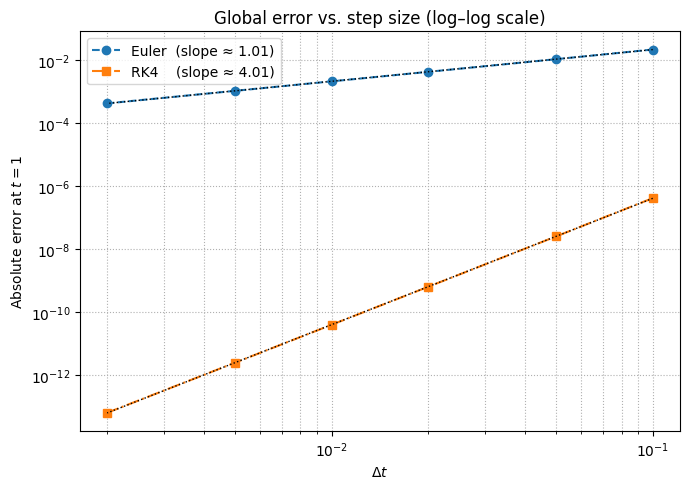

Δt	Euler_error	RK4_error
1.000e-01	2.162e-02	4.129e-07
5.000e-02	1.066e-02	2.515e-08
2.000e-02	4.230e-03	6.340e-10
1.000e-02	2.109e-03	3.942e-11
5.000e-03	1.053e-03	2.457e-12
2.000e-03	4.210e-04	6.339e-14


In [ ]:
# ============================================================
# Problem 1.3: Global-error order check (Euler vs. RK4)
# ODE: dx/dt = -x + cos(t)     with x(0) = 0.5
# Target time : t_end = 1.0
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# ---------- configurable parameters ----------
t_end = 1.0
x0    = 0.5
dt_list = np.array([1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3])
# ---------------------------------------------

def rhs(t, x):          # right-hand side f(t, x)
    return -x + np.cos(t)

def exact_solution(t, x0):
    C = x0 - 0.5
    return 0.5*(np.sin(t) + np.cos(t)) + C*np.exp(-t)

def solve_euler(dt):
    n_steps = int(np.ceil(t_end/dt))
    t = 0.0
    x = x0
    for _ in range(n_steps):
        x += dt * rhs(t, x)
        t += dt
    return x

def solve_rk4(dt):
    n_steps = int(np.ceil(t_end/dt))
    t = 0.0
    x = x0
    for _ in range(n_steps):
        k1 = rhs(t,         x)
        k2 = rhs(t+dt/2,    x+dt/2*k1)
        k3 = rhs(t+dt/2,    x+dt/2*k2)
        k4 = rhs(t+dt,      x+dt*k3)
        x += dt/6*(k1 + 2*k2 + 2*k3 + k4)
        t += dt
    return x

# ---------- run experiments ----------
errors_euler = []
errors_rk4   = []
x_true = exact_solution(t_end, x0)

for dt in dt_list:
    errors_euler.append(abs(solve_euler(dt) - x_true))
    errors_rk4.append(abs(solve_rk4(dt)   - x_true))

errors_euler = np.array(errors_euler)
errors_rk4   = np.array(errors_rk4)

# ---------- linear fit in log-log space ----------
coeff_euler = np.polyfit(np.log10(dt_list), np.log10(errors_euler), 1)
coeff_rk4   = np.polyfit(np.log10(dt_list), np.log10(errors_rk4),   1)

slope_euler, intercept_euler = coeff_euler
slope_rk4,   intercept_rk4   = coeff_rk4

# ---------- plotting ----------
plt.figure(figsize=(7,5))
plt.loglog(dt_list, errors_euler, 'o--', label=f'Euler  (slope ≈ {slope_euler:.2f})')
plt.loglog(dt_list, errors_rk4,   's-.', label=f'RK4    (slope ≈ {slope_rk4:.2f})')

# fitted reference lines
fit_line_euler = 10**(intercept_euler) * dt_list**slope_euler
fit_line_rk4   = 10**(intercept_rk4)   * dt_list**slope_rk4
plt.loglog(dt_list, fit_line_euler, 'k:',  linewidth=1)
plt.loglog(dt_list, fit_line_rk4,   'k:',  linewidth=1)

plt.xlabel(r'$\Delta t$')
plt.ylabel(r'Absolute error at $t=1$')
plt.title('Global error vs. step size (log–log scale)')
plt.grid(True, which='both', ls=':')
plt.legend()
plt.tight_layout()
plt.show()

# ---------- print numeric table ----------
print("Δt\tEuler_error\tRK4_error")
for dt, e_eu, e_rk in zip(dt_list, errors_euler, errors_rk4):
    print(f"{dt:.3e}\t{e_eu:.3e}\t{e_rk:.3e}")


Δx = 0.0050,  Δt = 6.2500e-06,  r = 0.250  (must be ≤ 0.5)


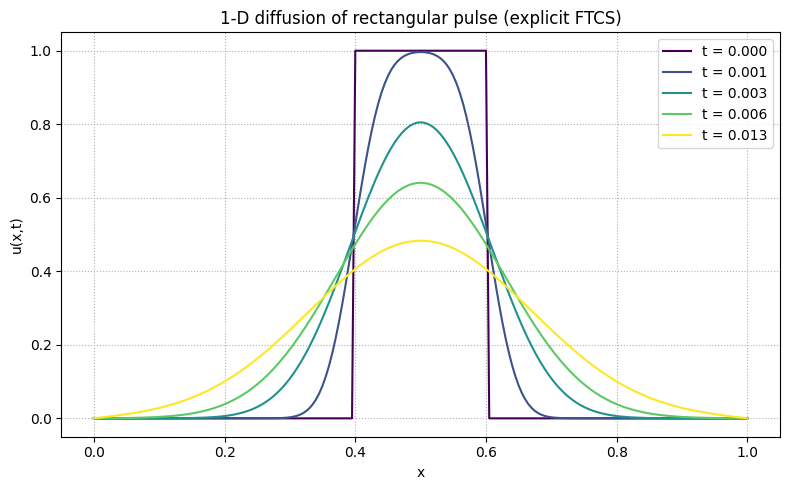

In [ ]:
# ==========================================================
# Problem 2.1 : 1-D diffusion equation (explicit FTCS scheme)
# ∂u/∂t = D ∂²u/∂x² , D = 1
# Initial condition : rectangle pulse
# Boundary condition : u = 0 at both ends (Dirichlet)
# ==========================================================

import numpy as np
import matplotlib.pyplot as plt

# ---------- user-configurable parameters ------------------
L   = 1.0        # spatial domain length
Nx  = 201        # number of grid points  -> Δx = L/(Nx-1)
dx  = L / (Nx-1)

D   = 1.0        # diffusion coefficient
dt  = 0.25 * dx*dx / D   # choose r = 0.25 < 0.5 for stability
Nt  = 2000       # number of time steps to march
snap_idx = [0, 100, 500, 1000, 2000]  # steps to snapshot
# ----------------------------------------------------------

# stability print-out (helpful sanity check)
r = D*dt/dx**2
print(f"Δx = {dx:.4f},  Δt = {dt:.4e},  r = {r:.3f}  (must be ≤ 0.5)")

# initial condition : rectangle (height 1 on middle third)
x = np.linspace(0, L, Nx)
u = np.where((0.4 <= x) & (x <= 0.6), 1.0, 0.0)

# storage for snapshots
snapshots = {0: u.copy()}

# FTCS time stepping
u_new = u.copy()
for n in range(1, Nt+1):
    # explicit scheme (vectorized, interior points only)
    u_new[1:-1] = u[1:-1] + r * (u[2:] - 2*u[1:-1] + u[:-2])
    # boundary values (Dirichlet 0)
    u_new[0] = u_new[-1] = 0.0
    u, u_new = u_new, u       # swap references

    if n in snap_idx:
        snapshots[n] = u.copy()

# ------------- static visualization -----------------------
plt.figure(figsize=(8,5))
colors = plt.cm.viridis(np.linspace(0,1,len(snapshots)))
for c, (step, data) in zip(colors, snapshots.items()):
    plt.plot(x, data, color=c, label=f"t = {step*dt:.3f}")

plt.title("1-D diffusion of rectangular pulse (explicit FTCS)")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.grid(True, which='both', ls=':')
plt.legend()
plt.tight_layout()
plt.show()


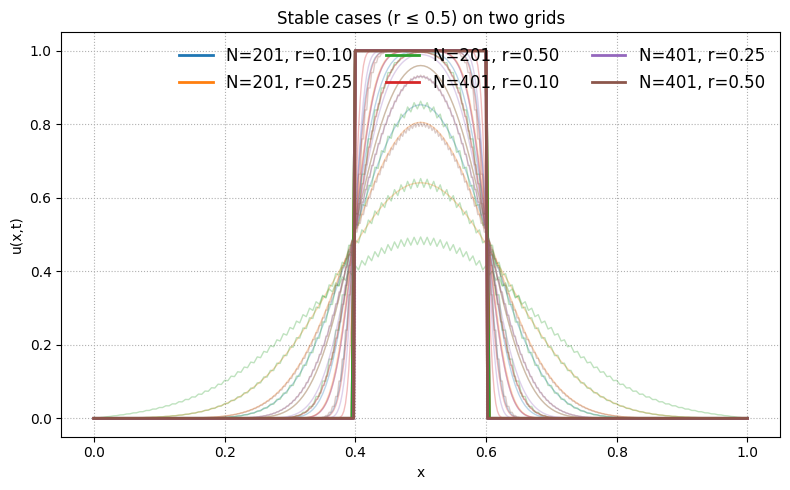

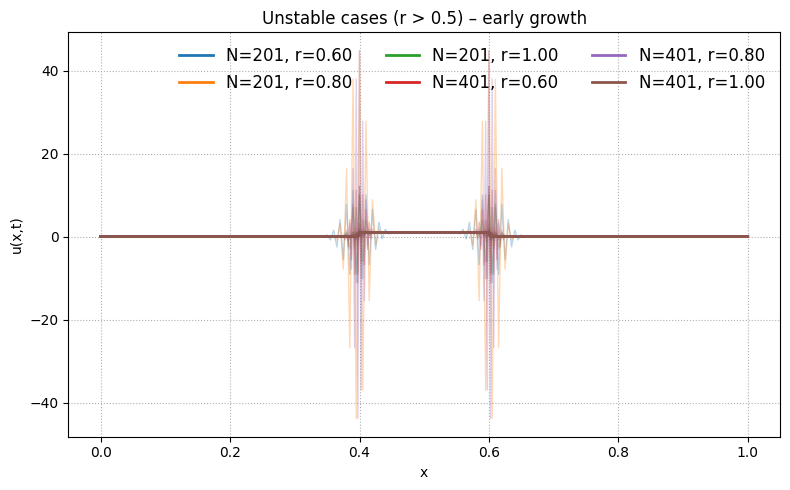

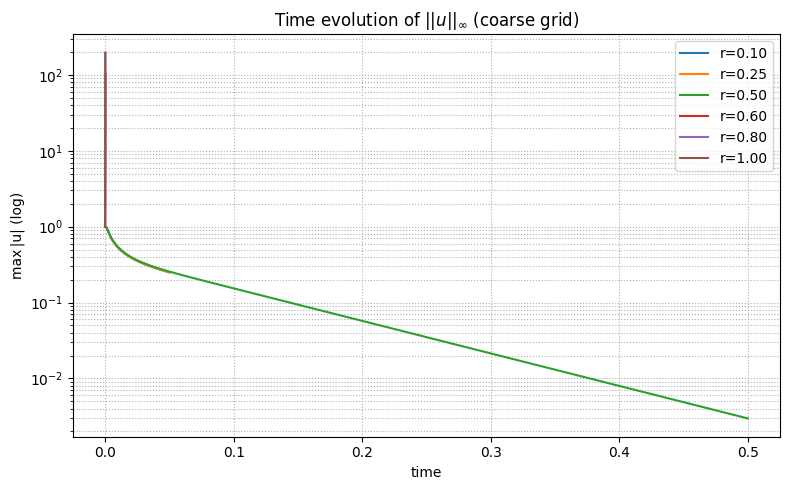

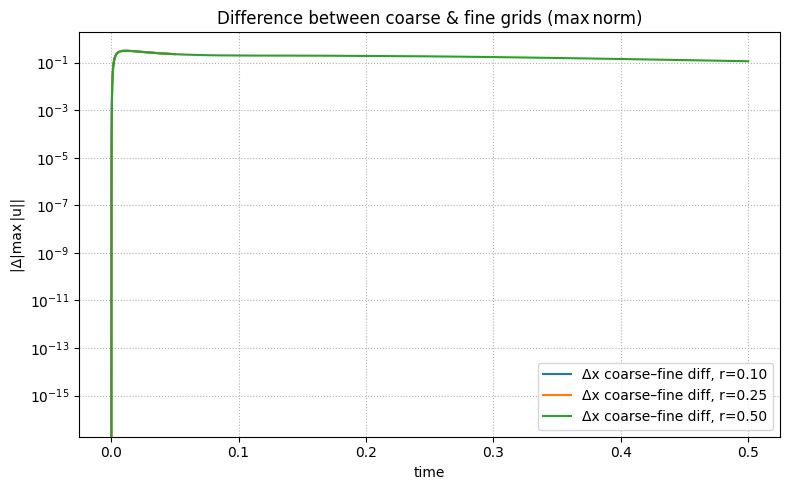


Summary (FTCS stability & resolution test)
Nx	r	Δx		Δt		Stable?	Diverge_step
201	0.10	5.000e-03	2.500e-06	True	-
201	0.25	5.000e-03	6.250e-06	True	-
201	0.50	5.000e-03	1.250e-05	True	-
201	0.60	5.000e-03	1.500e-05	False	23
201	0.80	5.000e-03	2.000e-05	False	10
201	1.00	5.000e-03	2.500e-05	False	7
401	0.10	2.500e-03	6.250e-07	True	-
401	0.25	2.500e-03	1.563e-06	True	-
401	0.50	2.500e-03	3.125e-06	True	-
401	0.60	2.500e-03	3.750e-06	False	23
401	0.80	2.500e-03	5.000e-06	False	10
401	1.00	2.500e-03	6.250e-06	False	7


In [ ]:
# ==========================================================
# Problem 2.2 (extended) : Stability & resolution analysis
# 1-D diffusion  ∂u/∂t = D ∂²u/∂x²   with D = 1
# Explicit FTCS scheme – sweep over r & two spatial grids
# ==========================================================

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# ----------------------- global config --------------------
L      = 1.0     # domain length
D      = 1.0     # diffusion coefficient
r_vals = [0.10, 0.25, 0.50, 0.60, 0.80, 1.00]
Nx_vals = [201, 401]      # coarse & fine grid for Δx convergence
base_t_end = 0.05         # default stop time (stable cases)
critical_long_factor = 10 # extend t_end for r == 0.50
div_thresh = 100.0        # divergence threshold for |u|max
# ----------------------------------------------------------

def run_ftcs(Nx, r, t_end, snap_extra_unstable=True):
    """Returns snapshots dict, max-norm history, diverged?, diverge_step."""
    dx = L / (Nx - 1)
    dt = r * dx * dx / D
    n_steps = int(np.ceil(t_end / dt))

    x = np.linspace(0, L, Nx)
    u  = np.where((0.4 <= x) & (x <= 0.6), 1.0, 0.0)
    u_new = u.copy()

    # snapshot indices
    snap_std = [0, 50, 200, 500, 1000]
    snap_unstable = [1, 2, 4, 8, 16, 32]
    snap_idx = set(snap_std)
    if snap_extra_unstable and r > 0.5:
        snap_idx.update(snap_unstable)

    snaps = {0: u.copy()}
    max_hist = [np.max(np.abs(u))]
    diverged = False
    d_step   = None

    for n in range(1, n_steps + 1):
        u_new[1:-1] = u[1:-1] + r * (u[2:] - 2*u[1:-1] + u[:-2])
        u_new[0] = u_new[-1] = 0.0
        u, u_new = u_new, u

        if n in snap_idx:
            snaps[n] = u.copy()

        max_hist.append(np.max(np.abs(u)))
        if max_hist[-1] > div_thresh and not diverged:
            diverged, d_step = True, n
            break

    # truncate max_hist time array to executed steps
    tt = np.arange(len(max_hist)) * dt
    return x, snaps, (tt, np.array(max_hist)), diverged, d_step, dx, dt

# --------------------- master dictionaries ----------------
stable_profiles   = defaultdict(dict)   # key: (Nx, r)
unstable_profiles = defaultdict(dict)
maxnorms          = defaultdict(dict)   # key: (Nx, r) -> (t, max|u|)
summary_rows      = []

# --------------------------- runs -------------------------
for Nx in Nx_vals:
    for r in r_vals:
        # critical case gets longer integration
        t_end = base_t_end * (critical_long_factor if np.isclose(r, 0.5) else 1.0)
        x, snaps, maxdat, diverged, dstep, dx, dt = run_ftcs(Nx, r, t_end)

        key = (Nx, r)
        maxnorms[key] = maxdat
        if diverged:
            unstable_profiles[key] = snaps
        else:
            stable_profiles[key] = snaps

        summary_rows.append((Nx, r, dx, dt, not diverged, dstep))

# -------------------- plotting helpers -------------------
# -------------------- improved profile plot --------------------
from itertools import cycle
def plot_profiles(profile_dict, title, ylim=None):
    """Plot stable / unstable profiles with clear legend colours."""

    if not profile_dict:
        return
    plt.figure(figsize=(8, 5))

    # ── 1. 独立した色を (Nx,r) ごとに割り当て ────────────────
    color_cycle = cycle(plt.cm.tab10(np.linspace(0, 1, 10)))
    for (Nx, r), snaps in sorted(profile_dict.items()):
        base_color = next(color_cycle)
        # 時刻順に描画：最初 (t=0) を太線、以降を淡色
        for step in sorted(snaps.keys()):
            data = snaps[step]
            t = step * r * (L / (Nx - 1))**2 / D
            lw  = 2.0 if step == 0 else 1.0
            alp = 1.0 if step == 0 else 0.3           # 濃淡で区別
            label = f"N={Nx}, r={r:.2f}" if step == 0 else None
            plt.plot(np.linspace(0, L, Nx), data,
                     color=base_color, lw=lw, alpha=alp, label=label)

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("u(x,t)")
    if ylim:
        plt.ylim(ylim)
    plt.grid(True, ls=':')
    # ── 2. 凡例を大きく、列数可変にして見やすく ───────────────
    plt.legend(fontsize=12, ncol=3, frameon=False, loc='upper right')
    plt.tight_layout()
    plt.show()


# ---------- figure A: stable (both grids) -----------------
plot_profiles(stable_profiles, "Stable cases (r ≤ 0.5) on two grids")

# ---------- figure B: unstable (both grids) ---------------
plot_profiles(unstable_profiles, "Unstable cases (r > 0.5) – early growth")

# -------- figure C: max norm histories (coarse grid) ------
plt.figure(figsize=(8,5))
for (Nx, r), (tt, mm) in maxnorms.items():
    if Nx == Nx_vals[0]:  # coarse grid only for clarity
        plt.semilogy(tt, mm, label=f"r={r:.2f}")
plt.title("Time evolution of $||u||_{∞}$ (coarse grid)")
plt.xlabel("time"); plt.ylabel("max |u| (log)")
plt.grid(True, which='both', ls=':')
plt.legend()
plt.tight_layout()
plt.show()

# --------- figure D: grid-convergence check ----------------
plt.figure(figsize=(8,5))
for r in [0.10, 0.25, 0.50]:
    (t_co, m_co) = maxnorms[(Nx_vals[0], r)]
    (t_fi, m_fi) = maxnorms[(Nx_vals[1], r)]
    plt.semilogy(t_co, np.abs(m_co - m_fi[:len(m_co)]),
                 label=f"Δx coarse–fine diff, r={r:.2f}")
plt.title("Difference between coarse & fine grids (max norm)")
plt.xlabel("time"); plt.ylabel("|Δ|max |u||")
plt.grid(True, which='both', ls=':')
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------ summary table -------------------
print("\nSummary (FTCS stability & resolution test)")
print("Nx\tr\tΔx\t\tΔt\t\tStable?\tDiverge_step")
for Nx, r, dx, dt, stable, step in summary_rows:
    div_str = "-" if stable else step
    print(f"{Nx}\t{r:.2f}\t{dx:.3e}\t{dt:.3e}\t{stable}\t{div_str}")


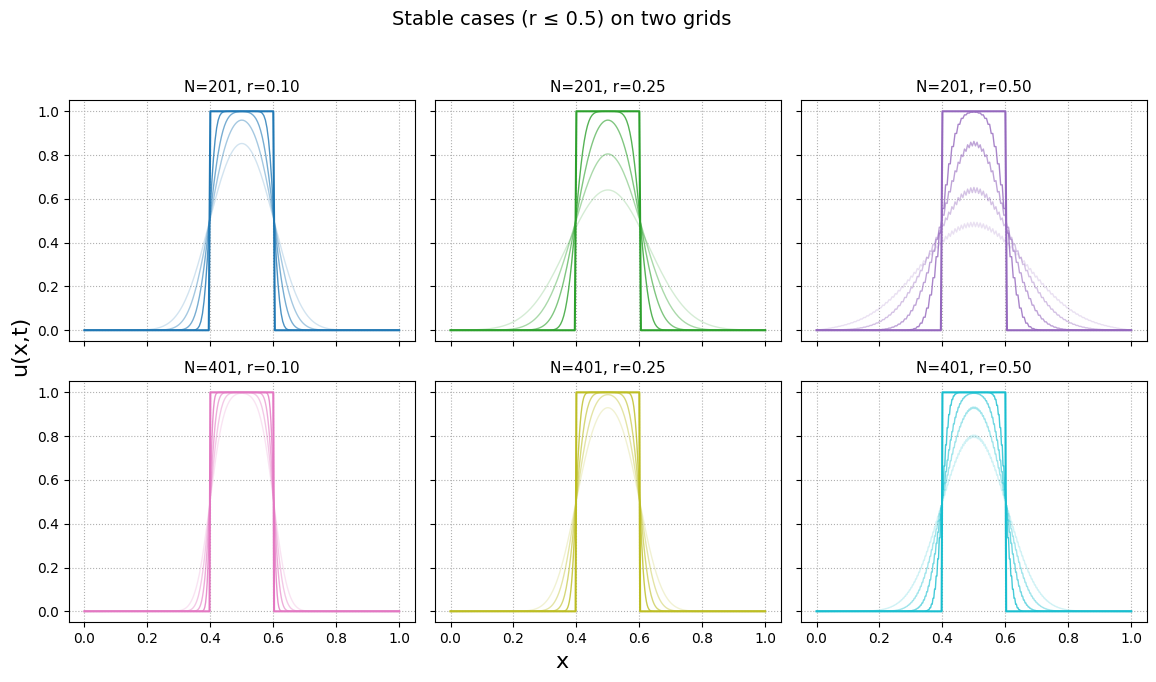

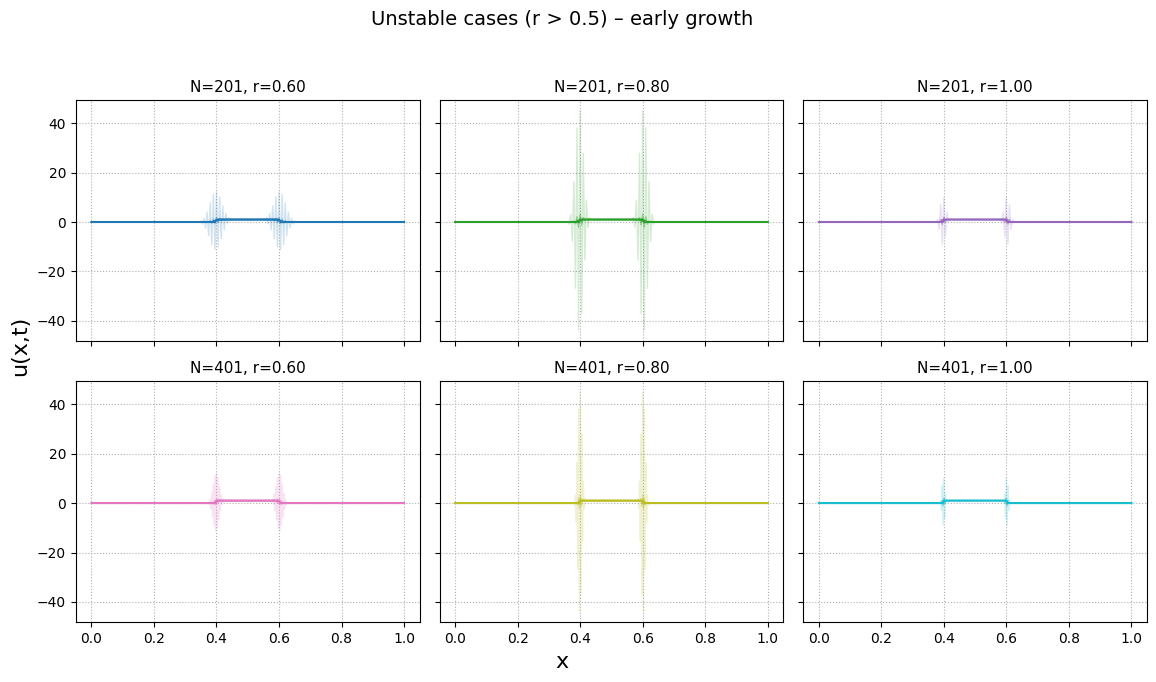

In [ ]:
# ==================================================================
# Panel-style visualisation for FTCS stability study
# (assumes `stable_profiles` and `unstable_profiles` already exist)
# ==================================================================
import numpy as np
import matplotlib.pyplot as plt

def panel_plot(profiles, title, ylim=None, cols=3):
    keys = sorted(profiles.keys())          # (Nx, r) pairs
    n_panels = len(keys)
    rows = int(np.ceil(n_panels / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows),
                             sharex=True, sharey=True)
    axes = axes.flatten()

    for ax, key, colour in zip(
            axes, keys,
            plt.cm.tab10(np.linspace(0, 1, len(keys)))):
        Nx, r = key
        snaps  = profiles[key]
        x_grid = np.linspace(0, L, Nx)

        # sort by step so the time progression is monotone
        for alpha, step in zip(np.linspace(1, 0.2, len(snaps)), sorted(snaps)):
            ax.plot(x_grid, snaps[step],
                    color=colour, lw=1.5 if step == 0 else 1,
                    alpha=alpha)
        ax.set_title(f"N={Nx}, r={r:.2f}", fontsize=11)
        ax.grid(True, ls=':')

    # hide empty axes
    for ax in axes[n_panels:]:
        ax.axis('off')

    if ylim:
        for ax in axes[:n_panels]:
            ax.set_ylim(ylim)

    # single, centralised y/x label
    fig.text(0.04, 0.5, "u(x,t)", va='center', rotation='vertical', fontsize=16)
    fig.text(0.5, 0.04, "x", ha='center', fontsize=16)
    fig.suptitle(title, fontsize=14, y=0.98)
    plt.tight_layout(rect=[0.05, 0.05, 1, 0.95]) # Adjust layout to make space for super title
    plt.show()

# Call the panel_plot function for stable and unstable profiles
panel_plot(stable_profiles, "Stable cases (r ≤ 0.5) on two grids")
panel_plot(unstable_profiles, "Unstable cases (r > 0.5) – early growth")

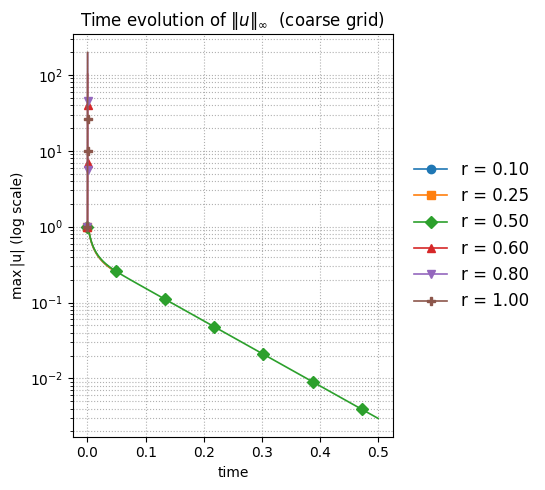

In [ ]:
# -------- figure C: max norm histories (coarse grid) ------
plt.figure(figsize=(7,5))
markers = ['o', 's', 'D', '^', 'v', 'P']  # enough for 6 lines
for k, ((Nx, r), (tt, mm)) in enumerate(maxnorms.items()):
    if Nx == Nx_vals[0]:        # coarse gridのみ
        plt.semilogy(tt, mm, label=f"r = {r:.2f}",
                     marker=markers[k], markevery=0.12, lw=1.2)

plt.title(r"Time evolution of $\|u\|_\infty$  (coarse grid)")
plt.xlabel("time")
plt.ylabel("max |u| (log scale)")
plt.grid(True, which='both', ls=':')
#  ↓ 凡例を外に出す
plt.legend(fontsize=12, frameon=False,
           bbox_to_anchor=(1.02, 0.5), loc="center left")
plt.tight_layout(rect=[0,0,0.8,1])  # 右側に余白確保
plt.show()


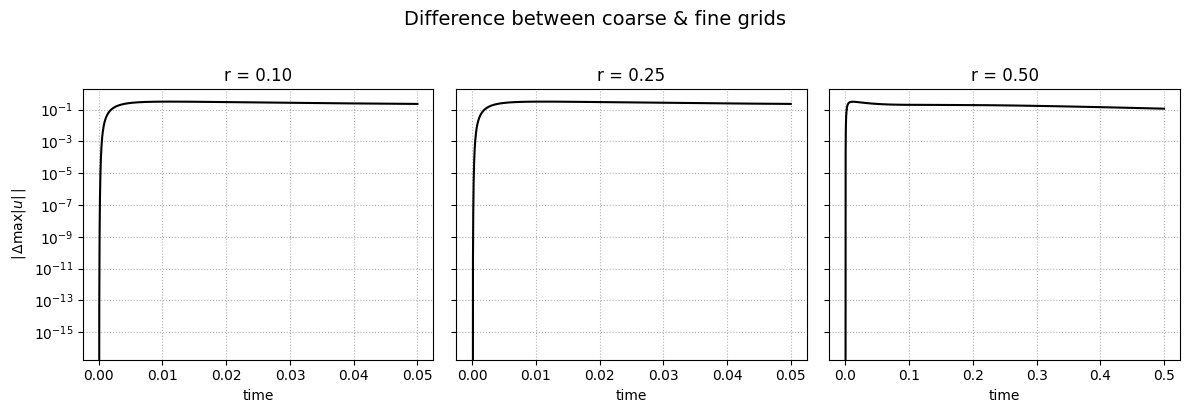

In [ ]:
# --------- figure D: grid-convergence check (3 r values) ---
fig, axes = plt.subplots(1, 3, figsize=(12,4), sharey=True)
r_to_ax = {0.10:0, 0.25:1, 0.50:2}
for r in [0.10, 0.25, 0.50]:
    ax = axes[r_to_ax[r]]
    (t_co, m_co) = maxnorms[(Nx_vals[0], r)]
    (t_fi, m_fi) = maxnorms[(Nx_vals[1], r)]
    diff = np.abs(m_co - m_fi[:len(m_co)])
    ax.semilogy(t_co, diff, 'k-', lw=1.5)
    ax.set_title(f"r = {r:.2f}", fontsize=12)
    ax.grid(True, which='both', ls=':')
    ax.set_xlabel("time")
axes[0].set_ylabel(r"$|\,\Delta \max|u|\,|$")
fig.suptitle("Difference between coarse & fine grids", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


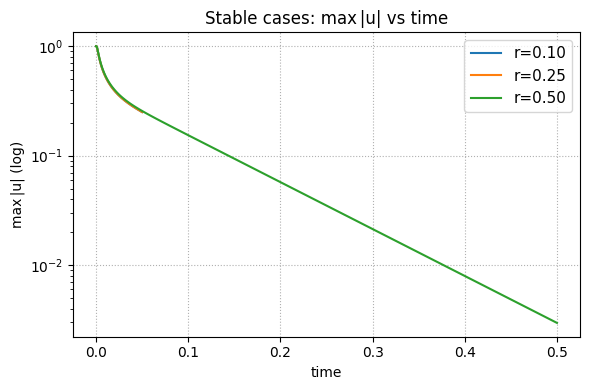

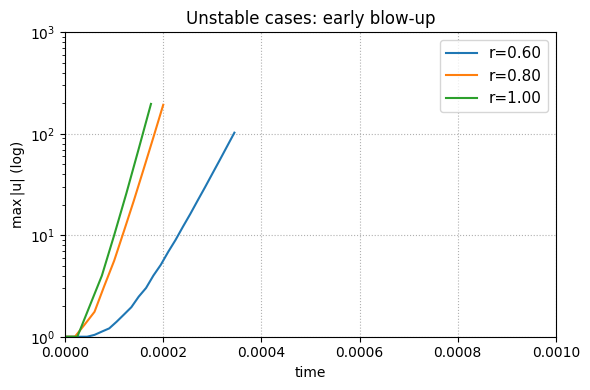

In [ ]:
# ------ stable r ≤ 0.5 ------------
plt.figure(figsize=(6,4))
for (Nx,r),(tt,mm) in maxnorms.items():
    if Nx==201 and r<=0.5:
        plt.semilogy(tt, mm, label=f"r={r:.2f}")
plt.title("Stable cases: max |u| vs time")
plt.xlabel("time"); plt.ylabel("max |u| (log)")
plt.legend(fontsize=12); plt.grid(True, ls=':')
plt.tight_layout(); plt.show()

# ------ unstable r > 0.5 (short window) ------------
plt.figure(figsize=(6,4))
for (Nx,r),(tt,mm) in maxnorms.items():
    if Nx==201 and r>0.5:
        plt.semilogy(tt, mm, label=f"r={r:.2f}")
plt.xlim(0, 0.001)              # ズーム
plt.ylim(1, 1e3)
plt.title("Unstable cases: early blow-up")
plt.xlabel("time"); plt.ylabel("max |u| (log)")
plt.legend(fontsize=11); plt.grid(True, ls=':')
plt.tight_layout(); plt.show()


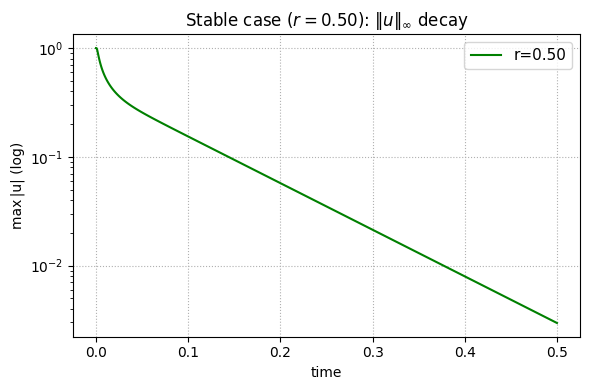

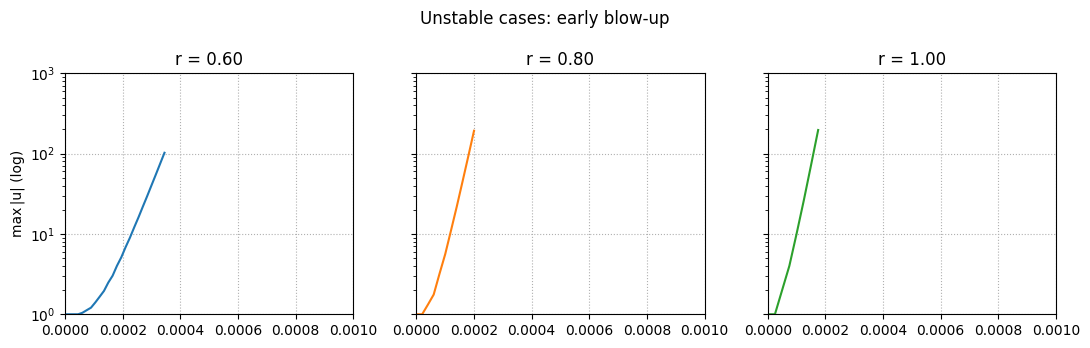

In [ ]:
# ----- stable: r=0.50 だけ描画 -----
plt.figure(figsize=(6,4))
tt, mm = maxnorms[(Nx_vals[0], 0.50)]
plt.semilogy(tt, mm, 'g-', lw=1.5, label='r=0.50')
plt.title(r"Stable case ($r=0.50$): $\|u\|_\infty$ decay")
plt.xlabel("time"); plt.ylabel("max |u| (log)")
plt.grid(True, ls=':'); plt.legend(fontsize=11)
plt.tight_layout(); plt.show()

# ----- unstable: 3 パネル -----
fig, axes = plt.subplots(1,3, figsize=(11,3.5), sharey=True)
for ax, r, c in zip(axes, [0.60,0.80,1.00], ['tab:blue','tab:orange','tab:green']):
    tt, mm = maxnorms[(Nx_vals[0], r)]
    ax.semilogy(tt, mm, color=c)
    ax.set_title(f"r = {r:.2f}")
    ax.set_xlim(0, 0.001); ax.set_ylim(1, 1e3)
    ax.grid(True, ls=':')
axes[0].set_ylabel("max |u| (log)")
fig.suptitle("Unstable cases: early blow-up")
plt.tight_layout(); plt.show()
